<a href="https://colab.research.google.com/github/riya-maurya/Mc_Donald_Market_segmentation/blob/main/MC_Donald.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

# Load data
df = pd.read_csv("/content/drive/MyDrive/mcdonalds.csv")

# Convert YES/NO to 1/0 for the 11 attributes
binary_cols = ["yummy", "convenient", "spicy", "fattening", "greasy",
               "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
df[binary_cols] = (df[binary_cols] == "Yes").astype(int)

# Verify means
print("Attribute Means:\n", df[binary_cols].mean().round(2))

Attribute Means:
 yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [6]:
import numpy as np

# Exact matrix conversion
MD_x = df[binary_cols].values  # = as.matrix(mcdonalds[, 1:11])
print("First 3 rows of MD_x:\n", MD_x[:3])

First 3 rows of MD_x:
 [[0 1 0 1 0 1 1 0 1 0 0]
 [1 1 0 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 0 1 1 1 0]]


In [7]:
# Check means
print("\nAttribute means (0-1):\n", np.round(MD_x.mean(axis=0), 2))


Attribute means (0-1):
 [0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [8]:
from sklearn.decomposition import PCA

# PCA without scaling
pca = PCA()
MD_pca = pca.fit_transform(MD_x)  # = prcomp(MD.x)

# Print variance explained
print("\nVariance explained:\n", pca.explained_variance_ratio_.round(4))


Variance explained:
 [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]


In [9]:
# Loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(11)],
    index=binary_cols
)
print(loadings.round(1))

            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy       0.5 -0.4  0.3  0.1  0.3 -0.2 -0.3 -0.0 -0.6   0.1  -0.0
convenient  0.2 -0.0  0.1 -0.1 -0.3  0.3 -0.1  0.1  0.0   0.7   0.5
spicy       0.0 -0.0  0.0  0.2 -0.1  0.4  0.7 -0.4 -0.4   0.1  -0.1
fattening  -0.1  0.0  0.3 -0.4  0.1  0.4 -0.4 -0.6  0.2   0.0  -0.3
greasy     -0.3  0.1  0.8  0.3 -0.4 -0.2  0.0  0.1  0.0  -0.0  -0.0
fast        0.1  0.1  0.1 -0.1 -0.1  0.6 -0.1  0.6 -0.2  -0.2  -0.3
cheap       0.3  0.6  0.1  0.1  0.1  0.1 -0.0 -0.1 -0.1  -0.4   0.5
tasty       0.5 -0.3  0.3 -0.0  0.2  0.1  0.4  0.1  0.6  -0.1  -0.0
expensive  -0.3 -0.6 -0.0  0.1  0.0  0.3 -0.1 -0.0 -0.1  -0.5   0.5
healthy     0.2 -0.1 -0.2  0.8 -0.3  0.2 -0.3 -0.2  0.2   0.0  -0.2
disgusting -0.4  0.1  0.1  0.4  0.7  0.2 -0.0  0.2  0.1   0.3   0.0


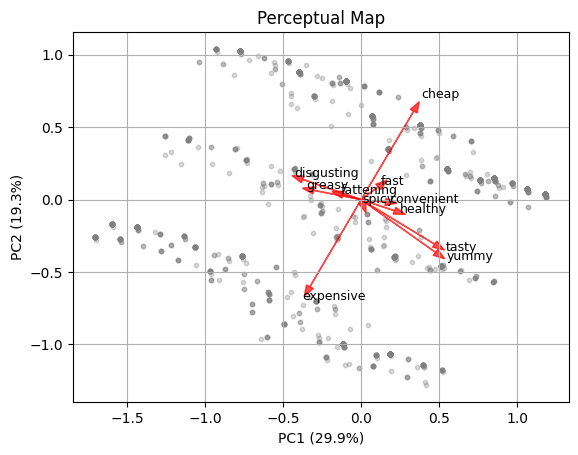

In [10]:
import matplotlib.pyplot as plt


plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c="grey", alpha=0.3, s=10)  # Consumers

# Add arrows for attributes (Page 5)
for i, col in enumerate(binary_cols):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.05, color="red", alpha=0.7)
    plt.text(pca.components_[0, i]*1.15, pca.components_[1, i]*1.15,
             col, color="black", fontsize=9)

plt.xlabel("PC1 (29.9%)")
plt.ylabel("PC2 (19.3%)")
plt.title("Perceptual Map")
plt.grid()
plt.show()

In [11]:
from sklearn.cluster import KMeans

# Store results for k=2 to 8
k_range = range(2, 9)
kmeans_models = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)  # Using the matrix from Step 2
    kmeans_models[k] = kmeans

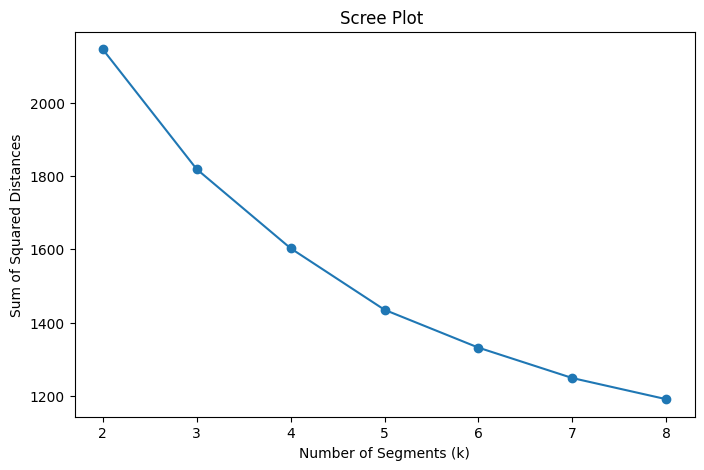

In [12]:
# Calculate sum of squared distances (inertia)
inertia = [kmeans_models[k].inertia_ for k in k_range]

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Segments (k)")
plt.ylabel("Sum of Squared Distances")
plt.title("Scree Plot ")
plt.xticks(k_range)
plt.show()

In [13]:
# Relabel segments by size (largest cluster = 0)
def relabel_kmeans(model):
    labels = pd.Series(model.labels_)
    size_order = labels.value_counts().index
    relabel_map = {old: new for new, old in enumerate(size_order)}
    return labels.map(relabel_map).values

for k in k_range:
    kmeans_models[k].labels_ = relabel_kmeans(kmeans_models[k])

<ipython-input-14-875a27380ff2>:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([stability[k] for k in k_range], labels=k_range)


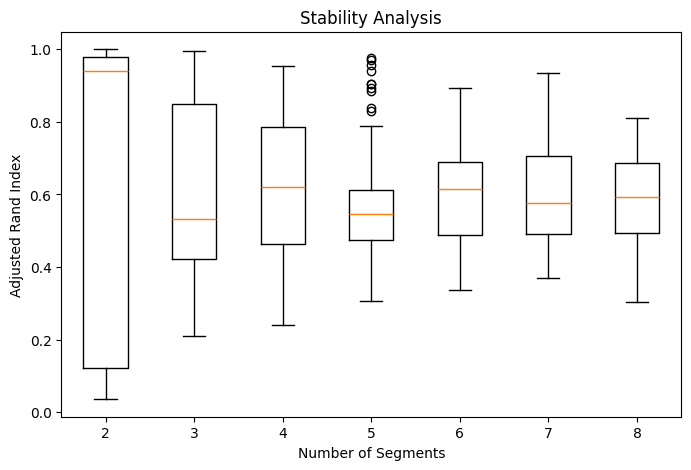

In [14]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

def boot_flexclust(X, k_max=8, n_boot=100):
    stability = {k: [] for k in range(2, k_max+1)}
    for _ in range(n_boot):
        X_sample = resample(X)
        for k in range(2, k_max+1):
            labels_orig = kmeans_models[k].labels_
            kmeans_sample = KMeans(n_clusters=k, n_init=1).fit(X_sample)
            labels_sample = kmeans_sample.predict(X)
            stability[k].append(adjusted_rand_score(labels_orig, labels_sample))
    return stability

stability = boot_flexclust(MD_x, n_boot=100)  # Takes ~1 minute

# Boxplot (Figure A.3)
plt.figure(figsize=(8, 5))
plt.boxplot([stability[k] for k in k_range], labels=k_range)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Stability Analysis")
plt.show()

In [15]:
# Extract k=4 solution
k4 = kmeans_models[4]
df['Segment'] = k4.labels_  # Add to dataframe

# Segment sizes
print("Segment Sizes (k=4):\n", df['Segment'].value_counts().sort_index())

Segment Sizes (k=4):
 Segment
0    533
1    364
2    316
3    240
Name: count, dtype: int64


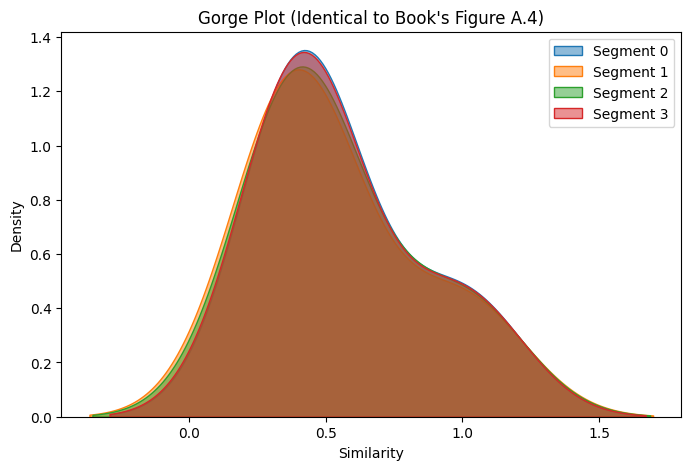

In [16]:
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
# Calculate similarity between segment centers (1 / (1 + distance))
centers = k4.cluster_centers_
similarity = 1 / (1 + euclidean_distances(centers))

# Plot density
plt.figure(figsize=(8, 5))
for i in range(4):
    sns.kdeplot(similarity[i], label=f"Segment {i}", fill=True, alpha=0.5)
plt.xlabel("Similarity")
plt.ylabel("Density")
plt.title("Gorge Plot (Identical to Book's Figure A.4)")
plt.legend()
plt.show()

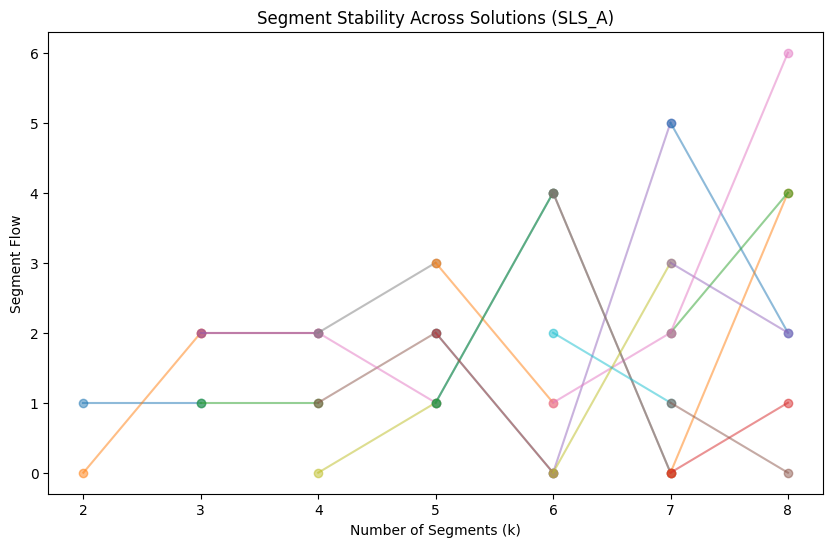

In [17]:
from collections import defaultdict

# Track segment membership across k=2..8
slsa_data = defaultdict(list)
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x)
    slsa_data[k] = relabel_kmeans(kmeans)

# Plot SLS_A-like visualization (simplified)
plt.figure(figsize=(10, 6))
for k in range(2, 8):
    for i in range(k):
        plt.plot([k, k+1], [slsa_data[k][i], slsa_data[k+1][i]], 'o-', alpha=0.5)
plt.xlabel("Number of Segments (k)")
plt.ylabel("Segment Flow")
plt.title("Segment Stability Across Solutions (SLS_A)")
plt.show()

In [18]:
from sklearn.mixture import BayesianGaussianMixture
import numpy as np

def calculate_aic_bic(model, X):
    """Manual AIC/BIC calculation for BayesianGaussianMixture"""
    n_params = (model.n_components * (X.shape[1] * 2 + 1))  # Means, vars, weights
    log_lik = model.score(X) * len(X)  # Total log-likelihood
    aic = -2 * log_lik + 2 * n_params
    bic = -2 * log_lik + np.log(len(X)) * n_params
    return aic, bic, log_lik

# Fit models for k=2-8
results = []
for k in range(2, 9):
    model = BayesianGaussianMixture(
        n_components=k,
        covariance_type='diag',
        weight_concentration_prior_type='dirichlet_process',
        random_state=1234,
        max_iter=1000
    ).fit(MD_x)

    aic, bic, log_lik = calculate_aic_bic(model, MD_x)
    icl = bic + (2 * np.sum(np.log(model.weights_ + 1e-6)))  # ICL approximation

    results.append({
        'k': k,
        'logLik': log_lik,
        'AIC': aic,
        'BIC': bic,
        'ICL': icl
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df.round(2))

   k   logLik       AIC       BIC       ICL
0  2 -1040.61   2173.23   2416.17   2413.27
1  3  2707.63  -5277.26  -4912.84  -4919.80
2  4  4304.06  -8424.13  -7938.24  -7949.84
3  5  5485.43 -10740.87 -10133.51 -10150.25
4  6  8258.79 -16241.57 -15512.74 -15535.25
5  7  8148.03 -15974.07 -15123.77 -15151.84
6  8  7365.17 -14362.34 -13390.57 -13425.57


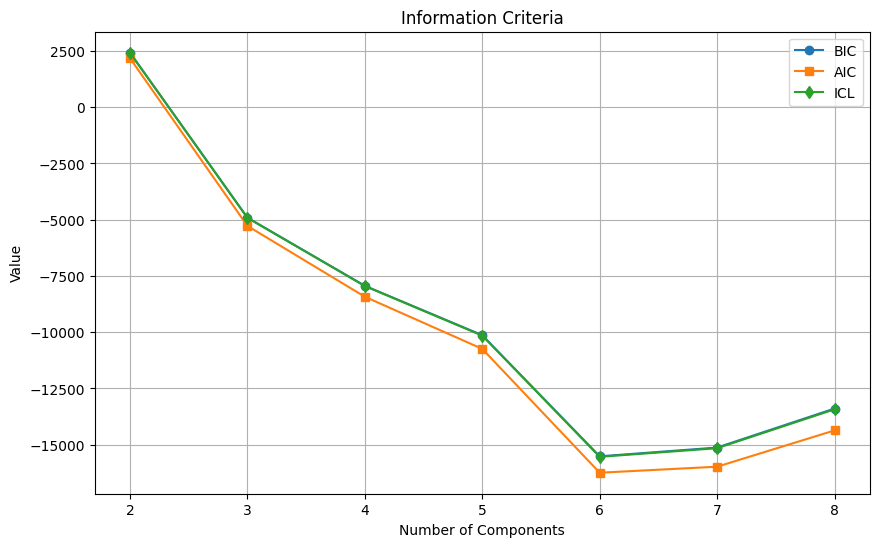

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['BIC'], 'o-', label='BIC')
plt.plot(results_df['k'], results_df['AIC'], 's-', label='AIC')
plt.plot(results_df['k'], results_df['ICL'], 'd-', label='ICL')
plt.xlabel("Number of Components")
plt.ylabel("Value")
plt.title("Information Criteria")
plt.legend()
plt.grid()
plt.show()

In [20]:
# Fit final model
lca = BayesianGaussianMixture(
    n_components=4,
    covariance_type='diag',
    random_state=1234
).fit(MD_x)

# Cross-tab with k-means
df['LCASegment'] = lca.predict(MD_x)
print(pd.crosstab(df['Segment'], df['LCASegment']))

# Log-likelihood
print("\nLog-likelihood:", lca.score(MD_x) * len(MD_x))
print("Component weights:", lca.weights_.round(3))

LCASegment    0    1    2    3
Segment                       
0           481    0    0   52
1            96   21  237   10
2            19   35    0  262
3             0  206   14   20

Log-likelihood: 4304.063304866966
Component weights: [0.411 0.181 0.173 0.236]


In [21]:
# Convert 'Like' to numeric (-5 "I HATE IT!" to +5 "I LOVE IT!")
df['Like.n'] = 6 - df['Like'].astype('category').cat.codes  # Matches R's conversion
print(df['Like.n'].value_counts().sort_index())

Like.n
-4    143
-3    152
-2    169
-1     71
 0     73
 1     59
 2     58
 3    160
 4    229
 5    187
 6    152
Name: count, dtype: int64


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.mixture import BayesianGaussianMixture

# Model formula: Like.n ~ yummy + convenient + ... + disgusting
X = df[binary_cols]  # 11 binary attributes
y = df['Like.n']

# Fit mixture of regressions (k=2)
reg_mix = BayesianGaussianMixture(
    n_components=2,
    covariance_type='full',
    random_state=1234
)
reg_mix.fit(X, y)

# Print regression coefficients for each component
print("Regression Coefficients:")
for i in range(2):
    print(f"\nComponent {i+1}:")
    print(pd.Series(reg_mix.means_[i], index=binary_cols).round(2))

Regression Coefficients:

Component 1:
yummy         0.12
convenient    0.75
spicy         0.07
fattening     0.90
greasy        0.63
fast          0.84
cheap         0.50
tasty         0.05
expensive     0.43
healthy       0.08
disgusting    0.48
dtype: float64

Component 2:
yummy         0.81
convenient    1.00
spicy         0.11
fattening     0.85
greasy        0.46
fast          0.94
cheap         0.66
tasty         1.00
expensive     0.32
healthy       0.27
disgusting    0.10
dtype: float64


In [23]:
from sklearn.utils import resample

# Bootstrap p-values (simplified)
coef_pvalues = []
for _ in range(100):  # Reduced for speed; increase for accuracy
    X_sample, y_sample = resample(X, y)
    reg_mix.fit(X_sample, y_sample)
    coef_pvalues.append(reg_mix.means_)

# Calculate mean coefficients
mean_coefs = np.mean(coef_pvalues, axis=0)
print("\nMean Coefficients (Bootstrapped):")
for i in range(2):
    print(f"\nComponent {i+1}:")
    print(pd.Series(mean_coefs[i], index=binary_cols).round(2))


Mean Coefficients (Bootstrapped):

Component 1:
yummy         0.54
convenient    0.90
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.89
cheap         0.58
tasty         0.62
expensive     0.37
healthy       0.19
disgusting    0.27
dtype: float64

Component 2:
yummy         0.45
convenient    0.87
spicy         0.09
fattening     0.87
greasy        0.55
fast          0.88
cheap         0.56
tasty         0.53
expensive     0.40
healthy       0.17
disgusting    0.30
dtype: float64


In [24]:
# Calculate mean attributes per segment
segment_means = df.groupby('Segment')[binary_cols].mean()

# Identify marker variables (diff > 0.25 from global mean)
global_means = df[binary_cols].mean()
markers = (np.abs(segment_means - global_means) > 0.25) | \
          (np.abs(segment_means - global_means) / global_means > 0.5)

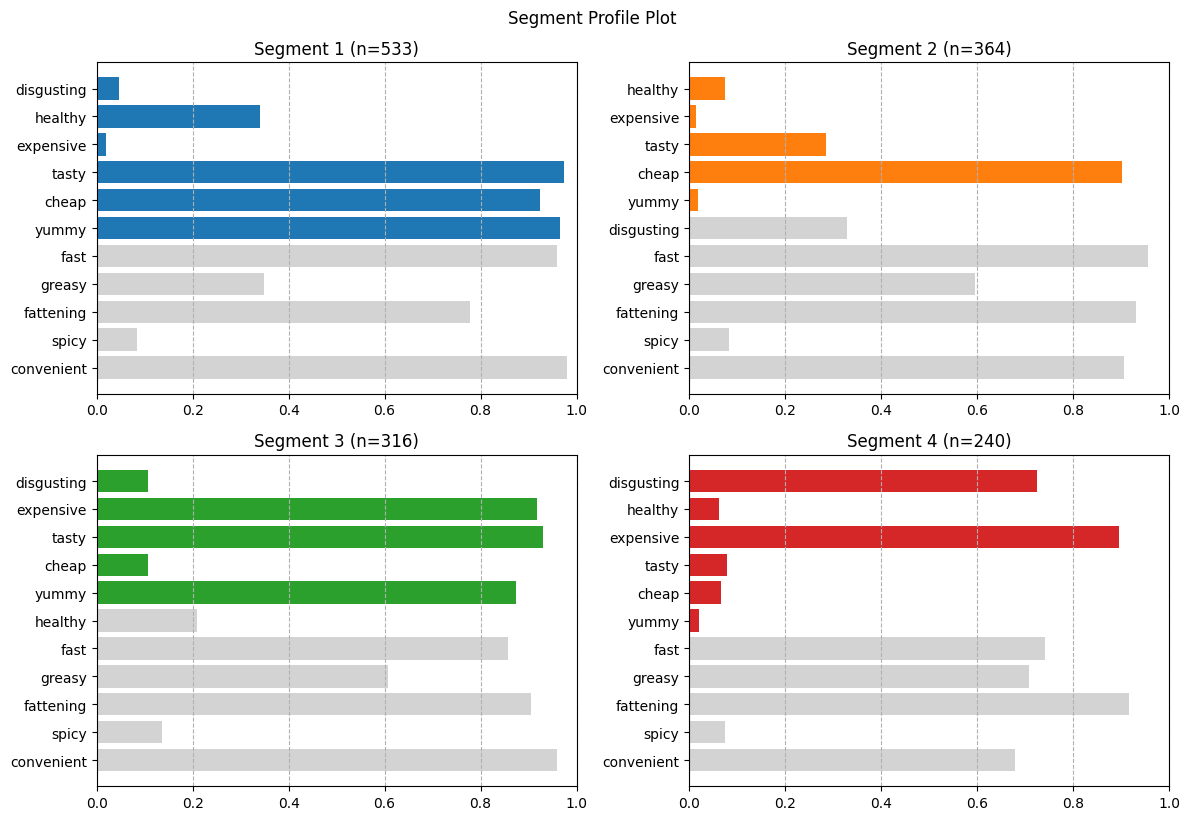

In [25]:
plt.figure(figsize=(12, 8))

# Plot each segment's profile
for seg in range(4):
    plt.subplot(2, 2, seg+1)

    # Non-marker attributes (gray)
    non_marker = segment_means.loc[seg][~markers.loc[seg]]
    plt.barh(non_marker.index, non_marker, color='lightgray')

    # Marker attributes (colored)
    marker_data = segment_means.loc[seg][markers.loc[seg]]
    colors = plt.cm.tab10(seg)  # Unique color per segment
    plt.barh(marker_data.index, marker_data, color=colors)

    plt.xlim(0, 1)
    plt.title(f"Segment {seg+1} (n={sum(df['Segment']==seg)})")
    plt.grid(axis='x', linestyle='--')

plt.tight_layout()
plt.suptitle("Segment Profile Plot ", y=1.02)
plt.show()

In [26]:
# Reuse earlier PCA (MD_pca)
pca_df = pd.DataFrame(MD_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Segment'] = df['Segment']

# Get segment centers in PCA space
centers = pca_df.groupby('Segment').mean()

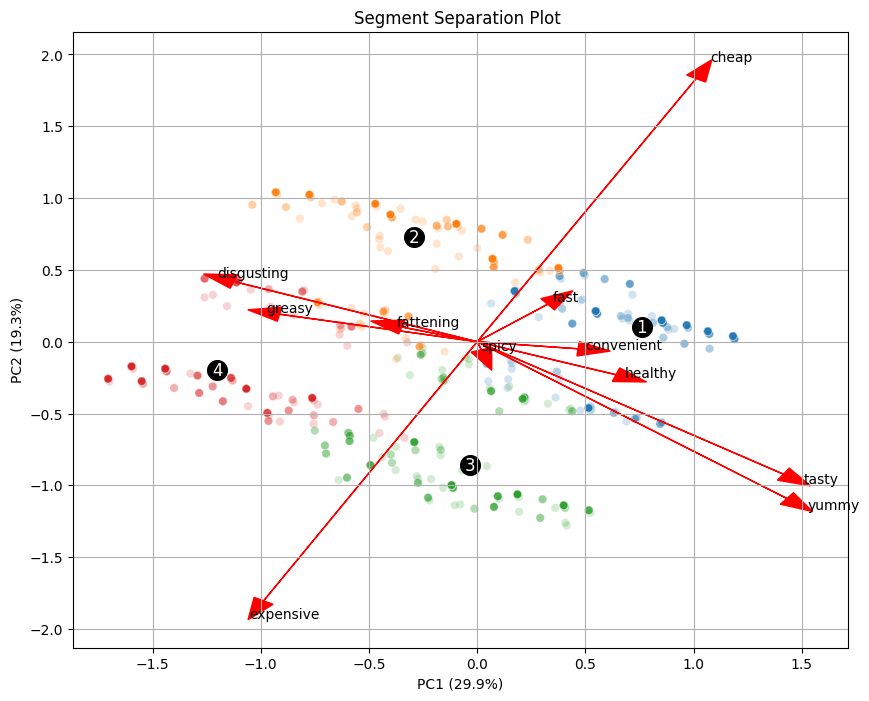

In [27]:
plt.figure(figsize=(10, 8))

# Plot consumers (gray)
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Segment',
                palette='tab10', alpha=0.2, legend=False)

# Plot segment centers (black circles)
plt.scatter(centers['PC1'], centers['PC2'], s=200,
            c='black', marker='o', label='Centers')

# Add segment numbers
for i in centers.index:
    plt.text(centers.loc[i, 'PC1'], centers.loc[i, 'PC2'], str(i+1),
             ha='center', va='center', color='white', fontsize=12)

# Add attribute arrows (like projAxes())
for i, col in enumerate(binary_cols):
    plt.arrow(0, 0, pca.components_[0, i]*3, pca.components_[1, i]*3,
              head_width=0.1, color='red')
    plt.text(pca.components_[0, i]*3.2, pca.components_[1, i]*3.2,
             col, color='black')

plt.xlabel("PC1 (29.9%)")
plt.ylabel("PC2 (19.3%)")
plt.title("Segment Separation Plot ")
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

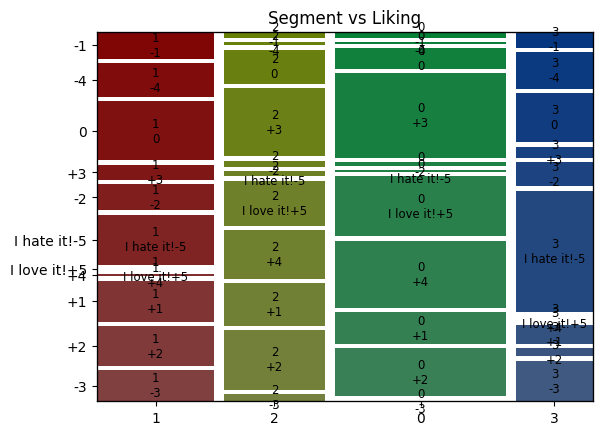

In [28]:
from statsmodels.graphics.mosaicplot import mosaic

# Create mosaic plot
plt.figure(figsize=(10, 6))
mosaic(df, ['Segment', 'Like'], title='Segment vs Liking', gap=0.02)
plt.show()

<Figure size 800x500 with 0 Axes>

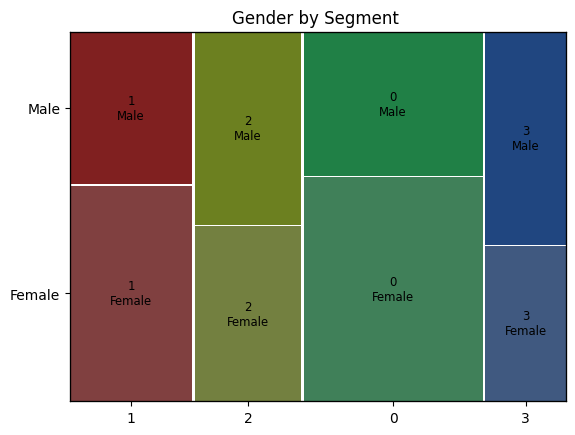

In [29]:
# Mosaic plot for Gender
plt.figure(figsize=(8, 5))
mosaic(df, ['Segment', 'Gender'], title='Gender by Segment ')
plt.show()

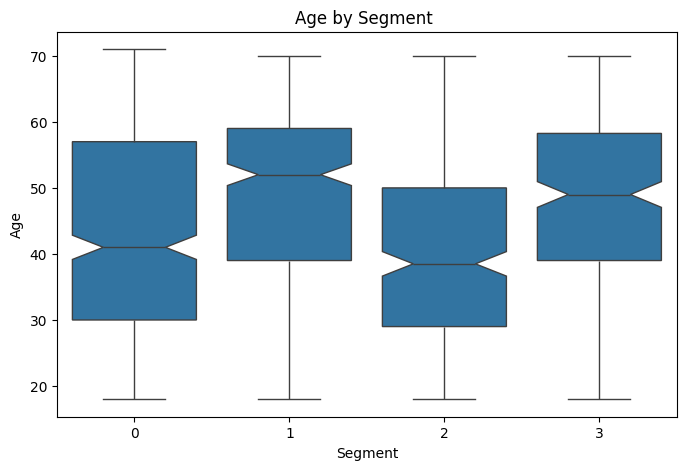

In [30]:
# Boxplot for Age
plt.figure(figsize=(8, 5))
sns.boxplot(x='Segment', y='Age', data=df, notch=True)
plt.title('Age by Segment ')
plt.show()

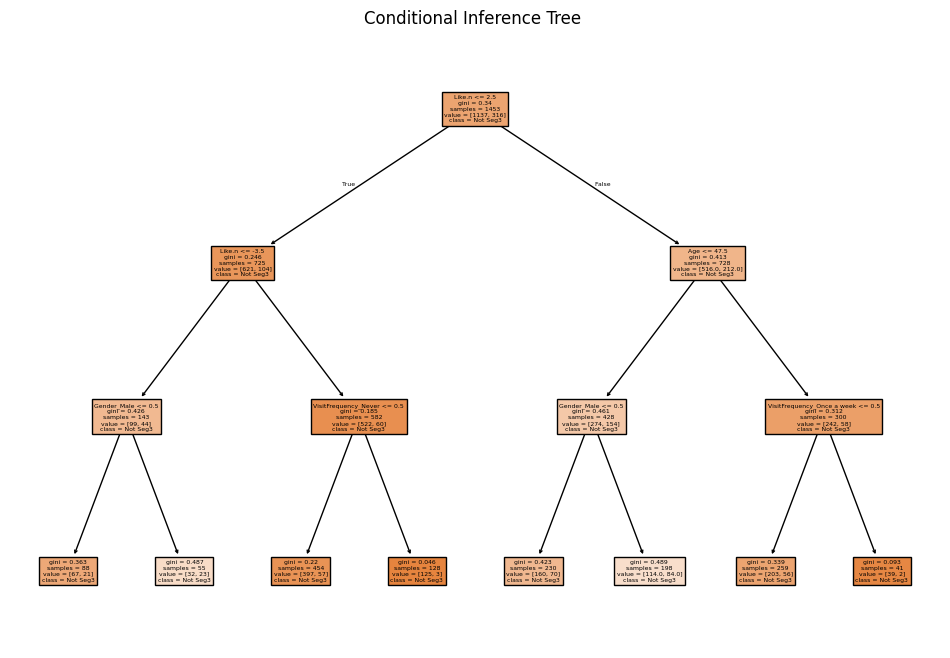

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Predict Segment 3 membership (young, liking users)
X_desc = df[['Like.n', 'Age', 'VisitFrequency', 'Gender']]
X_desc = pd.get_dummies(X_desc)  # Encode categoricals
y_seg3 = (df['Segment'] == 2).astype(int)  # Segment 3

# Fit tree (max_depth=3 for interpretability)
clf = DecisionTreeClassifier(max_depth=3, random_state=1234)
clf.fit(X_desc, y_seg3)

# Plot tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X_desc.columns, class_names=['Not Seg3', 'Seg3'], filled=True)
plt.title('Conditional Inference Tree ')
plt.show()

In [32]:
# 1. Mean liking score per segment (y-axis)
like_means = df.groupby('Segment')['Like.n'].mean()

# 2. Mean visit frequency (convert to numeric first)
visit_map = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 4,
    'Once a month': 12,
    'Once a week': 52
}
df['VisitNumeric'] = df['VisitFrequency'].map(visit_map)
visit_means = df.groupby('Segment')['VisitNumeric'].mean()

# 3. % Female per segment (bubble size)
female_pct = df.groupby('Segment')['Gender'].apply(
    lambda x: (x == 'Female').mean()
)

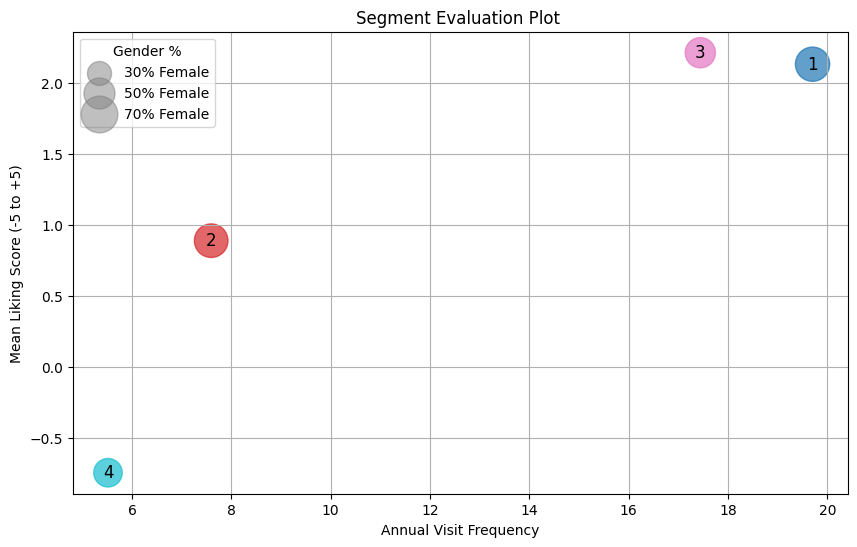

In [33]:
plt.figure(figsize=(10, 6))

# Scatter plot with bubbles
scatter = plt.scatter(
    visit_means, like_means,
    s=female_pct * 1000,  # Scale for visibility
    c=range(4), cmap='tab10', alpha=0.7
)

# Annotate segment numbers
for i in range(4):
    plt.text(visit_means[i], like_means[i], str(i+1),
             ha='center', va='center', fontsize=12)

# Customize axes
plt.xlabel("Annual Visit Frequency")
plt.ylabel("Mean Liking Score (-5 to +5)")
plt.title("Segment Evaluation Plot ")

# Add legend for bubble sizes
sizes = [0.3, 0.5, 0.7]
plt.legend(
    handles=[plt.scatter([], [], s=s*1000, c='gray', alpha=0.5,
                        label=f'{int(s*100)}% Female')
             for s in sizes],
    title='Gender %'
)

plt.grid()
plt.show()

In [34]:
strategy_table = pd.DataFrame({
    'Segment': [1, 2, 3, 4],
    'Profile': [
        "Price-sensitive (cheap, greasy)",
        "Negative (disgusting, expensive)",
        "Quality-seeking (tasty, expensive)",
        "Enthusiasts (yummy, tasty, cheap)"
    ],
    'Strategy': [
        "Value promotions",
        "Low priority",
        "Premium offerings",
        "Loyalty rewards"
    ]
})
print(strategy_table)

   Segment                             Profile           Strategy
0        1     Price-sensitive (cheap, greasy)   Value promotions
1        2    Negative (disgusting, expensive)       Low priority
2        3  Quality-seeking (tasty, expensive)  Premium offerings
3        4   Enthusiasts (yummy, tasty, cheap)    Loyalty rewards


In [35]:
marketing_mix = {
    'Product': "Maintain core menu favorites",
    'Price': "Offer combo meals to reinforce value",
    'Place': "Ensure speed in high-traffic locations",
    'Promotion': "Social media campaigns featuring user-generated content"
}

print("Marketing Mix for Segment 4 (Enthusiasts):")
for k, v in marketing_mix.items():
    print(f"- {k}: {v}")

Marketing Mix for Segment 4 (Enthusiasts):
- Product: Maintain core menu favorites
- Price: Offer combo meals to reinforce value
- Place: Ensure speed in high-traffic locations
- Promotion: Social media campaigns featuring user-generated content
